<a href="https://colab.research.google.com/github/Kyveli-tsioli/hello-world/blob/main/Copy_of_Autoencoders_assignement_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.6MB 12.2MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow as tf

In [ ]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
class_names = metadata.features['label'].names
#not included with the dataset, store them here to use later when plotting images 


print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples. #60000 training examples
num_test_examples = metadata.splits['test'].num_examples. #10000 test examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

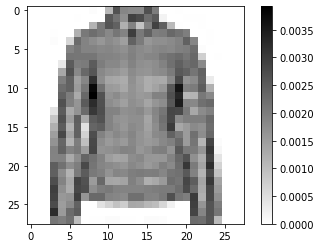

In [ ]:
#Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

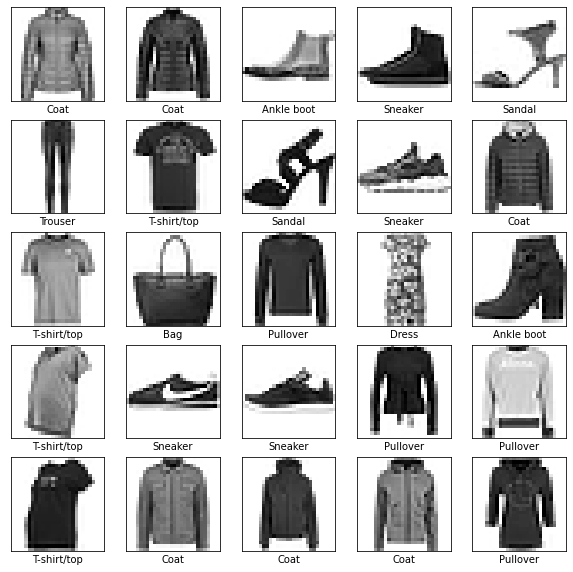

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
#images are 28x28 arrays with pixel values in the range [0,255]
#the labels are an array of integers in the range [0,9]: the class of clothing


test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
np.shape(train_dataset)

()

In [ ]:
##################################
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
train_images
print(np.shape(train_images))
print(np.shape(test_images))

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#create train set, validation set, test set
train_set=train_images[0:50000,:,:]
print("train set",np.shape(train_set))
valid_set=train_images[50000:60000,:,:]
print("validation set",np.shape(valid_set))
test_set=test_images
print("test set",np.shape(test_images))



train set (50000, 28, 28)
validation set (10000, 28, 28)
test set (10000, 28, 28)


In [ ]:
type(train_set)
print(type(valid_set))
print(type(test_set))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#label sets
train_set_labels=train_labels[0:50000]
print("train set labels",np.shape(train_set_labels))
valid_set_labels=train_labels[50000:60000]
print("validation set labels",np.shape(valid_set_labels))
test_set_labels=test_labels
print("test set labels",np.shape(test_set_labels))

train set labels (50000,)
validation set labels (10000,)
test set labels (10000,)


In [ ]:
train_set[0,:,:]
np.shape(train_set[0,:,:])

(28, 28)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

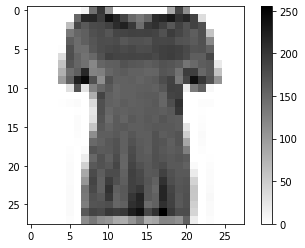

In [ ]:
plt.figure()
plt.imshow(train_set[10],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#preprocessing-normalisation

train_set=train_set/255.0
valid_set=valid_set/255.0
test_set=test_set/255.0

#scale these values to a range of 0 to 1 before feeding them to the neural network 
#divide the values by 255




In [ ]:
train_set[1,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

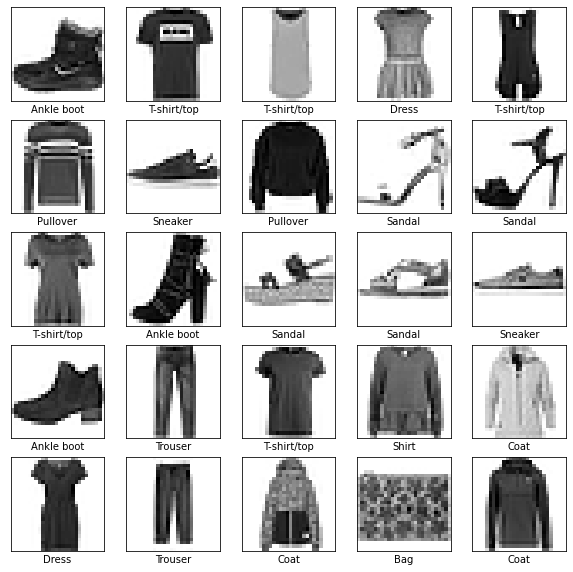

In [ ]:
#display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_set[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_set_labels[i]])
plt.show()

In [ ]:
type(test_set)

numpy.ndarray

In [ ]:
np.shape(train_set)

(50000, 28, 28)

In [ ]:
np.shape(valid_set)

(10000, 28, 28)

In [ ]:
#Construct the function noise which removes one or two quadrants of the image
def noise(x):
  for i in range(np.shape(train_set)[0]):
    x_offset=random.randint(1,14)
    y_offset=random.randint(1,14)
    for k in range(x_offset,x_offset+14):
      #for m in range(y_offset,y_offset+14):
        #x[i,k,m]=0
        for m in range(28):
          if (m in range(y_offset,y_offset+14)):
            x[i,k,m]=0
  return x


In [ ]:
#Construct the function noise which removes one or two quadrants of the image
def noise(x):
  for i in range(np.shape(train_set)[0]):
    x_offset=random.randint(1,14)
    y_offset=random.randint(1,14)
    for k in range(x_offset,x_offset+14):
        for m in range(y_offset,y_offset+14):
            x[i,k,m]=0
  return x


In [ ]:
#take the noise version of each and every picture in the training set
train_set_corr=noise(train_set)

In [ ]:
np.shape(train_set_corr)

(50000, 28, 28)

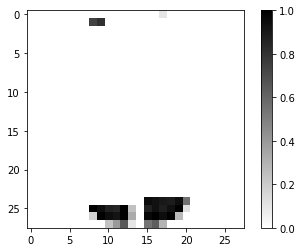

In [ ]:
plt.figure()
plt.imshow(train_set_corr[4],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

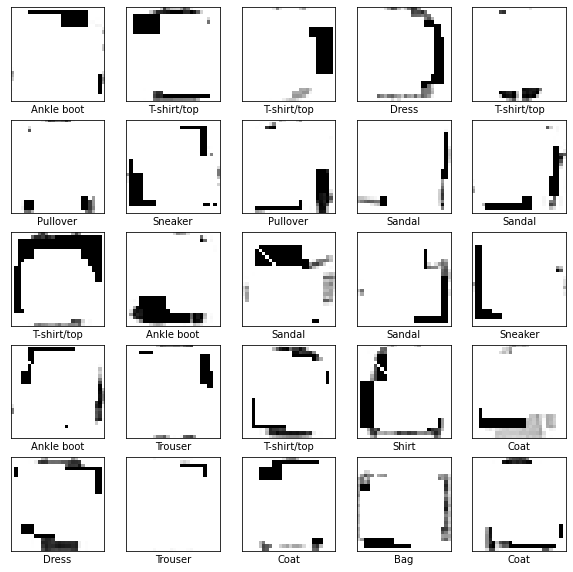

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_set_corr[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_set_labels[i]])
plt.show()

In [ ]:
#convert data to torch tensors
train_set_tensor=torch.tensor(train_set,dtype=torch.float)
train_labels_tensor=torch.tensor(train_labels,dtype=torch.float)
valid_set_tensor=torch.tensor(valid_set,dtype=torch.float)
valid_labels_tensor=torch.tensor(valid_set,dtype=torch.float)
test_set_tensor=torch.tensor(test_set,dtype=torch.float)
test_labels_tensor=torch.tensor(test_set,dtype=torch.float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:

n_input=np.shape(train_set[0])
n_hidden=3
n_output=n_input

#initialise tensor variables for weights
w1=torch.randn((1,n_hidden))


In [ ]:
#create TensorDataset and DataLoader that allows us to load batches of our data during each iteration
#batch_size=128
trainset=torch.utils.data.TensorDataset(train_set_tensor,train_labels_tensor)
#trainloader = torch.utils.data.DataLoader(train_set_tensordataset, batch_size=batch_size)




AssertionError: ignored

In [ ]:
class autoencoder(nn.Module):
  #def__init__(self):
    #self.input_size=28*28   #to be defined outside the class according to the size of the set 
    #self.fc1=nn.Linear(self.input_size,128)
    #self.fc2=nn.Linear(128,64)
    #self.fc3=nn.Linear(64,32)


  #weights
  #self.w1=torch.randn(self.input_size,self.hidden_size) 
  #self.w2=torch.randn(self.hidden_size,self.output_size)
    
    #def encoder(self,x): #define the structure 
      #x=self.fc1(x)
      #x=torch.sigmoid(x)
      #x=self.fc2(x)
      #x=torch.sigmoid(x)
      #x=self,fc3(x)
      #return x 


    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x



In [ ]:

learning_rate=0.05
epochs=100
model=autoencoder()
criterion=nn.MSELoss()
optimizer=optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
#training 


